Visualizing the Data Set

In [1]:
# importing libraries
library(tidyverse)
library(repr)
library(janitor)
library(ggplot2)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ──────

In [2]:
# Cleaning names and specifying categorical variable
diabetes <- read_csv("../data/diabetes.csv") |>
            clean_names() |>
            mutate(outcome = as_factor(outcome)) |>
            mutate(diabetes = fct_recode(outcome, "Yes" = "1", "No" = "0")) |>
            select(-outcome)

# Displaying the data
head(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,Yes
1,85,66,29,0,26.6,0.351,31,No
8,183,64,0,0,23.3,0.672,32,Yes
1,89,66,23,94,28.1,0.167,21,No
0,137,40,35,168,43.1,2.288,33,Yes
5,116,74,0,0,25.6,0.201,30,No


In [3]:
# splitting the diatabes data
diabetes_split <- initial_split(diabetes, prop = 0.75, strata = diabetes)

# training data
diabetes_training <- training(diabetes_split)

# testing data
diabetes_testing <- testing(diabetes_split)

# the data to be used
head(diabetes_training)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,No
5,116,74,0,0,25.6,0.201,30,No
4,110,92,0,0,37.6,0.191,30,No
10,139,80,0,0,27.1,1.441,57,No
1,103,30,38,83,43.3,0.183,33,No
3,126,88,41,235,39.3,0.704,27,No


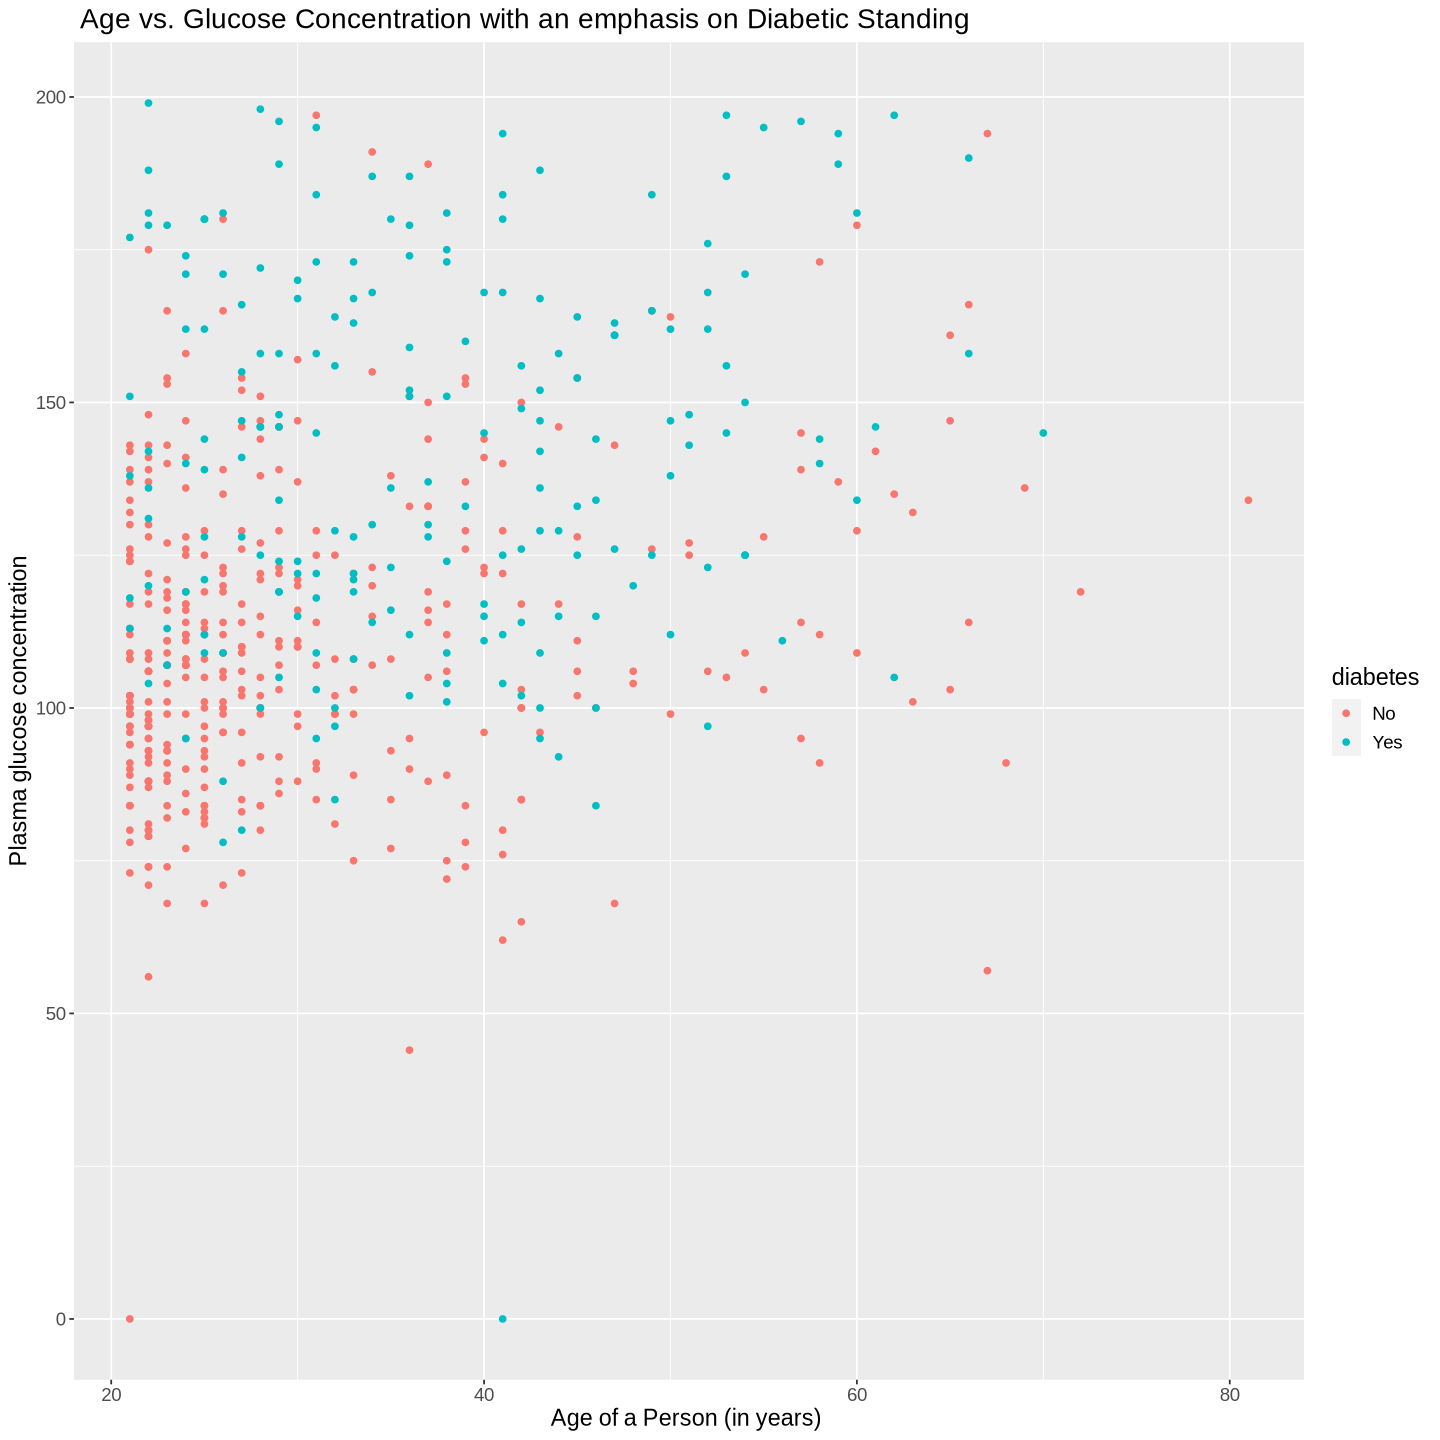

In [5]:
#The plot between Age and Glucose with an emphasis on their Diabetic Standing 

options(repr.plot.height = 12, repr.plot.width = 12)

glucose_vs_age_plot <- diabetes_training |> 
    ggplot(aes(x = age, y = glucose)) + 
    geom_point(aes(color = diabetes)) + 
    labs(x = "Age of a Person (in years) ", y = "Plasma glucose concentration",
             title = " Age vs. Glucose Concentration with an emphasis on Diabetic Standing") +
    theme(text = element_text(size = 14))
glucose_vs_age_plot 

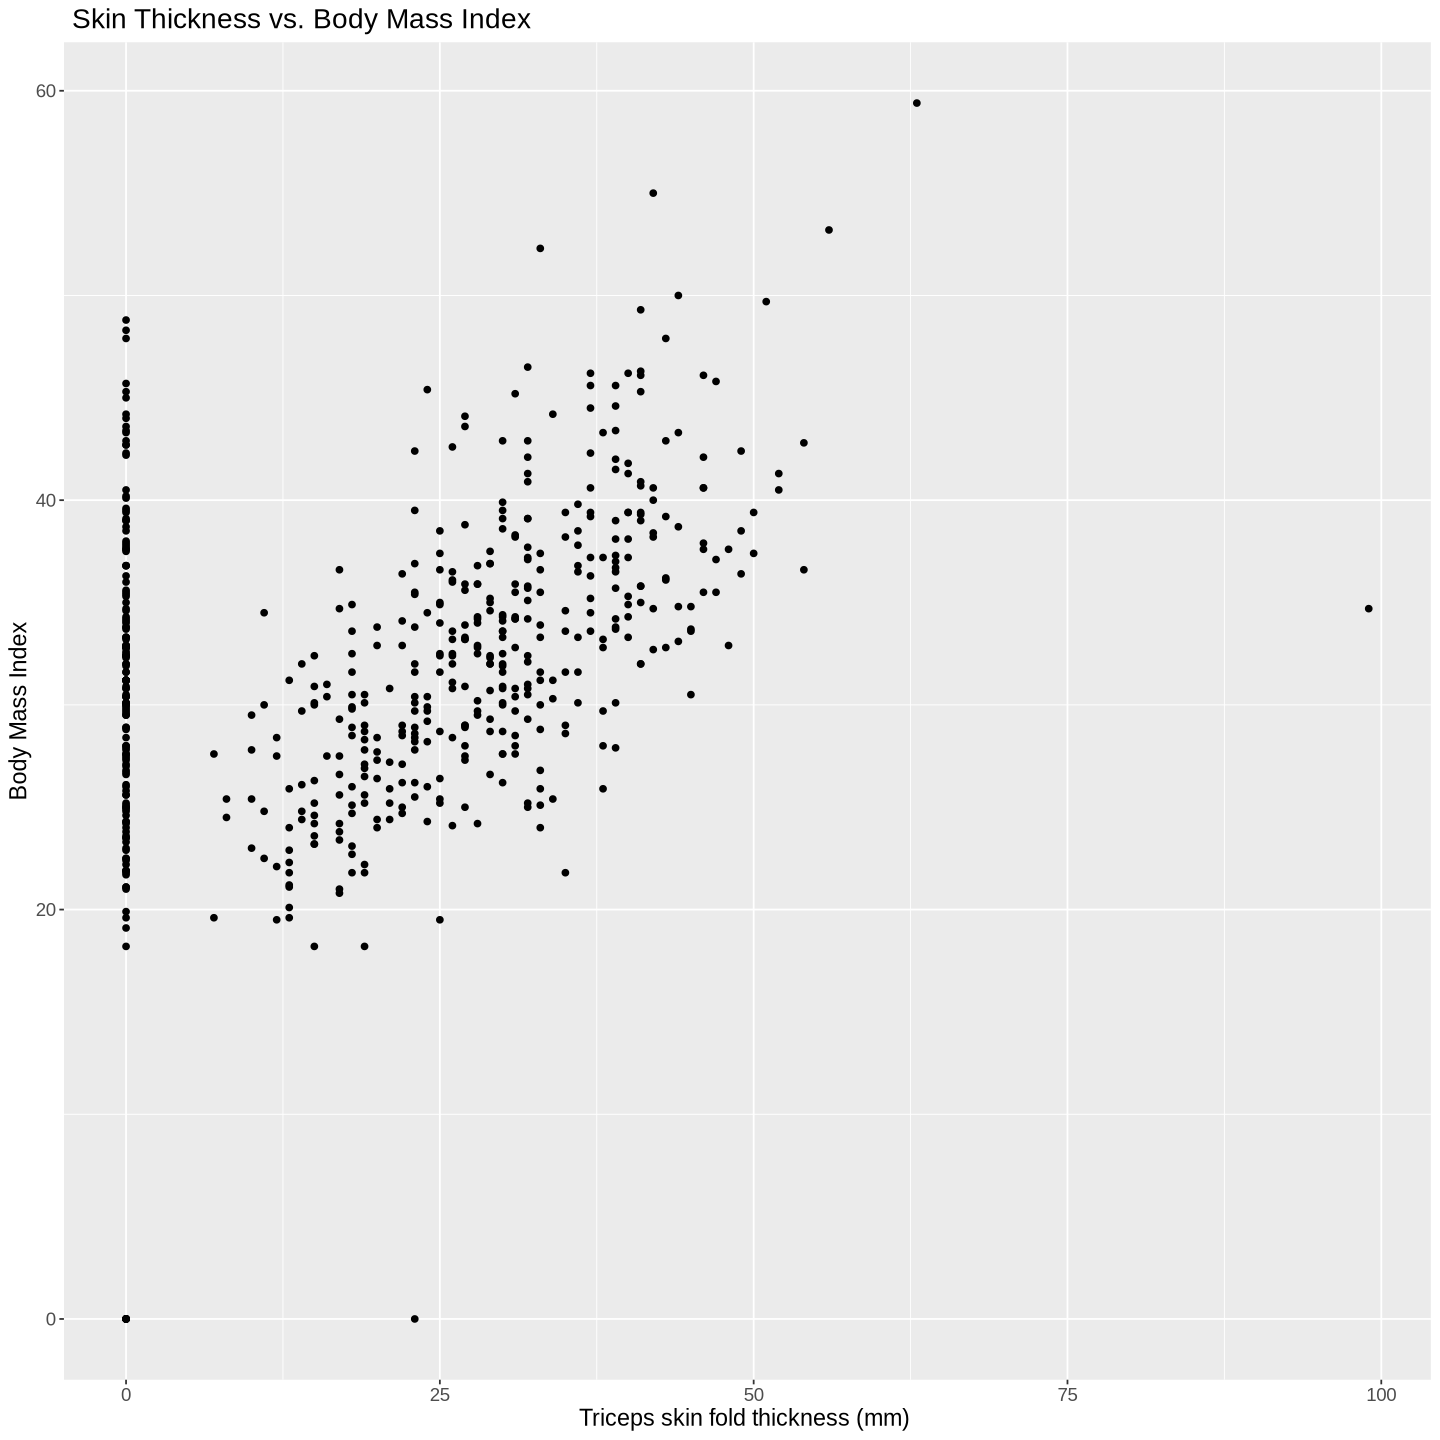

In [8]:
#The plot between Skin Thickness and BMI  

options(repr.plot.height = 12, repr.plot.width = 12)

skinthickness_vs_bmi_plot <- diabetes_training |> 
    ggplot(aes(x = skin_thickness, y = bmi)) + 
    geom_point() + 
    labs(x = "Triceps skin fold thickness (mm) ", y = "Body Mass Index",
             title = " Skin Thickness vs. Body Mass Index ") +
    theme(text = element_text(size = 14))
skinthickness_vs_bmi_plot 